# Udacity: Machine Learning Final Project 
#### by Rachel Foong

### Project Goal
The goal of this project is to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

### Dataset Exploration
Machine learning is useful to comb and refine the dataset that consists of **146 data points** with **21 features** with **18 Persons of Interest (POI)**. 

This is especially true when there are a large number of missing values represented as "NaNs" in each feature. To analyse the data, I've replaced NaNs with 0.

#### Observations
-  The loan advances, deferral_payments, director_fees and restricted_stock_deferred columns have the highest number of missing values
- Out of the set, total_payments and total_stock_value have the lowest amount of missing values

Through this simple table, it's easy to hypothesise that the POIs are essentially skewing the Max values. When we isolate the 18 POIs, we see a different story. 

POIs generally average higher in all values. It's strange to see that the Max values don't match the Max values earlier observed; which subsequently means that the outliers in the data are not all coming from POIs. 

### Outliers

When we dig deeper into the Max. values, we find that the email address which has the Max Value for total_payments is actually the "TOTAL" value for all columns. When we remove the outlier, the Max values now match the POI values and the total means are lower. 


While removing "TOTAL" helped in reconciling the differences between the POI and both POI and non-POI values, when we plot the two features for totals together, we find that there are still a couple of Outliers, especially one POI; namely **"LAY KENNETH L"**.

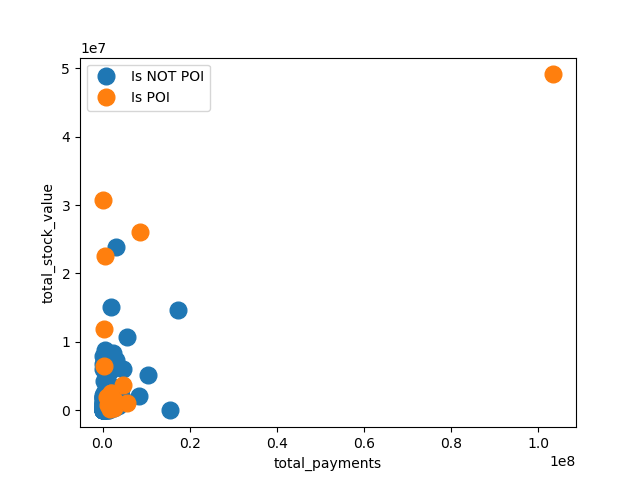

In [1]:
from IPython.display import Image
Image("Outlier1.png")

By removing "LAY KENNETH L", we get a really different look at the scatter plot and Mean/Max values. 

While there seems to be a positive correlation between the two features, we can clearly see it is weak even without calculating the correlation coeff. 

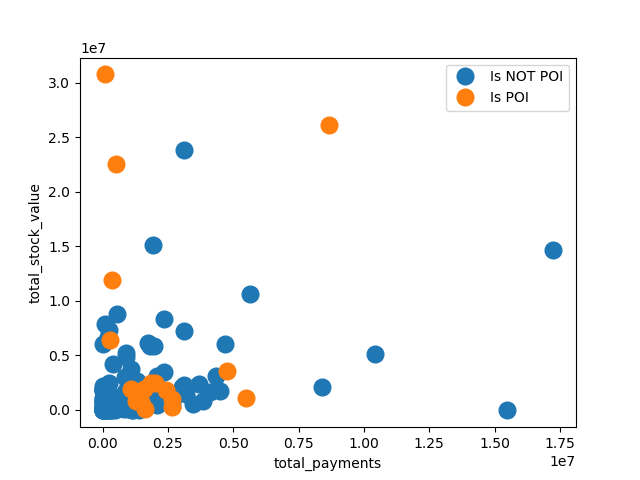

In [2]:
Image("Outlier2.png")

POI numbers without Kenneth Lay are also lower and Max. values also match the non-POI numbers. 

Now that we have cleaned up our data, we can finally move on to feature engineering. 

### Feature Engineering 

#### New Feature: % of Stock Value over Payments
At this point, while total_payments and total_stock_value have a low level of missing values and therefore one would assume a better fit for the data, it's all because these features happen to be totals of all the other features. 

However this pair makes for a good feature. When comparing averages of total stock value over payments, POI seem to have a higher total stock value per total payment ratio. We can use feature selection tools to evaluate this hypothesis.


#### Feature Scaling
I wonder which other features would be a better fit. In order to evaluate such I have removed all features that look at the email activity from and between poi and sender. And in order to perform feature reduction, I have applied scaling using MinMaxScaler to get rid of negative values. 


#### Feature Selection
By using LinearSVC as an initial classifier for comparing the two feature reduction techniques, PCA seems to works best when the number of features are 2.


### Algorithm comparison

With PCA as a means of feature selection, I chose GaussianNB algorithm and the Decision Tree algorithm as a means of testing. 

DecisionTree came out on top with an accuracy score of 0.84 vs GaussianNB's 0.19.

### Parameter Tuning and Validation

In order to achieve the possibility of a higher score, it's best to tune the parameters of the algorithm. If I don't do this well, I'll miss out on that opportunity and could possibly overfit the data. 

Under the [DecisionTreeClassifier documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) there are several parameters that can be tuned. I've chosen to tune the criterion, max_depth and the splitter out of curiosity rather than focusing on the leaf nodes. 

To sync with the tester.py random state, I have left the random state at 42. 

With Grid Search CV, I found that the "gini" criterion, mixed with the max_depth of 1 and a random splitter produced the best results.

Funnily enough, the new score is slightly lower than my earlier score of 0.84 i.e. 0.81. Good thing I did a double look. 


### Evaluation

Using sklearn's scoring functions we can get the Precision and Recall score of the predicted data.

Both will let us know the combination of algorithm, pca and feature scaling's ability to inform how accurate the predictions are. 

Unfortunately, the precision, recall and f1-score for POIs are low given the small amount of POIs. 